In [1]:
import re, sys, math
import glob
import random
import json
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import OrderedDict
import pandas as pd
from helper_utilities import *
from helper_plotutilities import *
from unet_model  import *
from unet_predict_sk import *

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Successfully imported packages!!!

START: 1526777299.037509

Successfully imported packages!!!



In [3]:
keys = ["samples", "logloss", "weighted_logloss","accuracy", "weighted_accuracy", "precision","recall", "f1_score", "true_positive", \
       "false_positive","true_negative","false_negative", "zero_contour_labels", "zero_contour_pred", \
       "missed_pred_lt_05", "missed_pred_gt_25", "missed_pred_gt_50", "missed_pred_eq_100"]
#explist256 = ['combined_1_3_256_epoch20', 'combined_1_3_256', 'combined_aug_1_3_256',\
# 'combined_drop_1_3_256','combined_aug_drop_1_3_256']
explist256 = [ 'combined_2_1_256', 'combined_aug_2_1_256', 'combined_drop_2_1_256','combined_drop_aug_2_1_256']

explist176 = ['combined_2_1_176', 'combined_aug_2_1_176', 'combined_drop_2_1_176',\
              'combined_drop_aug_2_1_176']

In [4]:
# ##################
# ## run prediction using pre-trained weights
# ################

# RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type1/results/'
# label_file176 = '/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy'
# image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy"
# for results_file in explist176 :
#     m_name = results_file
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     weights_file = RESULTS_PATH + results_file + '.hdf5'
#     print ("weights file", weights_file)
#     print ("pred_file", pred_file)


#     mnet = predict_with_pretrained_weights(model_name=m_name, nGPU=0, model_file=weights_file, image_size = 176, \
#                                 test_image_file = image_file)
#     #mnet.save_model_info(mpath)
#     print ("Saving predictions")
#     np.save(pred_file, mnet.predictions)

weights file /masvol/heartsmart/unet_model/method2type1/results/combined_2_1_176.hdf5
pred_file /masvol/heartsmart/unet_model/method2type1/results/combined_2_1_176_predictions.npy
------------------------------
Get Test images and labels...
------------------------------
load np arrays of images ...
------------------------------
Loading files :  /masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy
shape, max, min, mean of original image set: (270, 176, 176, 1) 255.0 0.0 77.2518
shape, max, min, mean after normalization: (270, 176, 176, 1) 1.0 0.0 0.26644456
------------------------------
Creating U-net model...
------------------------------
Building U-net model
------------------------------
conv1 shape: (?, 176, 176, 64)
conv1 shape: (?, 176, 176, 64)
pool1 shape: (?, 88, 88, 64)
conv2 shape: (?, 88, 88, 128)
conv2 shape: (?, 88, 88, 128)
pool2 shape: (?, 44, 44, 128)
conv3 shape: (?, 44, 44, 256)
conv3 shape: (?, 44, 44, 256)
pool3 shape: (?, 22, 22, 256

/masvol/heartsmart/unet_model/unet_model.py:193: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  self.model = Model(input = inputs, output = conv10)


------------------------------
------------------------------
Run predictions...
------------------------------
predict test data....
270/270 [==============================] - 4s 14ms/step
------------------------------
------------------------------
------------------------------
Saving predictions
weights file /masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_176.hdf5
pred_file /masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_176_predictions.npy
------------------------------
Get Test images and labels...
------------------------------
load np arrays of images ...
------------------------------
Loading files :  /masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy
shape, max, min, mean of original image set: (270, 176, 176, 1) 255.0 0.0 77.2518
shape, max, min, mean after normalization: (270, 176, 176, 1) 1.0 0.0 0.26644456
------------------------------
Creating U-net model...
------------------------------
Building U-

In [6]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type1/results/'
label_file176 = '/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy'

perf176_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist176 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file176, pred_file)
    perf176_df[results_file]= perf176_df['Attribute'].map(perf)
    

In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type1/results/'
label_file256 = '/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_labels.npy'

perf_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist256 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file256, pred_file)
    perf_df[results_file]= perf_df['Attribute'].map(perf)
   
    
   
        

In [7]:
perf176_df

,Attribute,combined_2_1_176,combined_aug_2_1_176,combined_drop_2_1_176,combined_drop_aug_2_1_176
0,samples,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
1,logloss,2.365448e-02,2.301333e-02,2.254946e-02,2.202512e-02
2,weighted_logloss,3.262743e-01,3.073611e-01,3.215377e-01,3.200924e-01
3,accuracy,9.766231e-01,9.772495e-01,9.777029e-01,9.782157e-01
4,weighted_accuracy,7.216072e-01,7.353850e-01,7.250333e-01,7.260820e-01
5,precision,9.594520e-01,9.570020e-01,9.625283e-01,9.640010e-01
6,recall,9.303483e-01,9.312379e-01,9.260060e-01,9.253610e-01
7,f1_score,9.446761e-01,9.439442e-01,9.439140e-01,9.442859e-01
8,true_positive,3.880120e+05,3.883830e+05,3.862010e+05,3.859320e+05
9,false_positive,1.639800e+04,1.745000e+04,1.503500e+04,1.441200e+04


In [8]:
file_name = '/masvol/heartsmart/unet_model/method2type1/results/2_1_176_perf_comparison.csv'
perf176_df.to_csv(file_name )

In [9]:
df1 = pd.read_csv(file_name,index_col=0)
df1

,Attribute,combined_2_1_176,combined_aug_2_1_176,combined_drop_2_1_176,combined_drop_aug_2_1_176
0,samples,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
1,logloss,2.365448e-02,2.301333e-02,2.254946e-02,2.202512e-02
2,weighted_logloss,3.262743e-01,3.073611e-01,3.215377e-01,3.200924e-01
3,accuracy,9.766231e-01,9.772495e-01,9.777029e-01,9.782157e-01
4,weighted_accuracy,7.216072e-01,7.353850e-01,7.250333e-01,7.260820e-01
5,precision,9.594520e-01,9.570020e-01,9.625283e-01,9.640010e-01
6,recall,9.303483e-01,9.312379e-01,9.260060e-01,9.253610e-01
7,f1_score,9.446761e-01,9.439442e-01,9.439140e-01,9.442859e-01
8,true_positive,3.880120e+05,3.883830e+05,3.862010e+05,3.859320e+05
9,false_positive,1.639800e+04,1.745000e+04,1.503500e+04,1.441200e+04


In [16]:
file_name2 = '/masvol/heartsmart/unet_model/method2type2/results/2_2_176_perf_comparison.csv'
df2 = pd.read_csv(file_name2,index_col=0)

In [17]:
df2

,Attribute,combined_2_2_176,combined_aug_2_2_176,combined_drop_2_2_176,combined_drop_aug_2_2_176
0,samples,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
1,logloss,1.668610e-02,1.746831e-02,1.425868e-02,1.614875e-02
2,weighted_logloss,1.714403e-01,2.298210e-01,1.921661e-01,2.135686e-01
3,accuracy,9.834523e-01,9.826834e-01,9.858425e-01,9.839809e-01
4,weighted_accuracy,8.424506e-01,7.946759e-01,8.251698e-01,8.076967e-01
5,precision,9.512601e-01,9.629766e-01,9.657977e-01,9.626659e-01
6,recall,9.559645e-01,9.425842e-01,9.428273e-01,9.434112e-01
7,f1_score,9.536065e-01,9.526713e-01,9.541743e-01,9.529413e-01
8,true_positive,4.010950e+05,3.954810e+05,3.955830e+05,3.958280e+05
9,false_positive,2.055100e+04,1.520500e+04,1.400900e+04,1.535100e+04


In [ ]:
for results_file in explist256 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_accuracy_and_loss(history_file)
    

In [ ]:
for results_file in explist176 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_accuracy_and_loss(history_file)

In [ ]:
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# y_true_f = np.load(label_file)
# y_pred_f = np.load(pred_file)
# p = get_performance_statistics(y_true_f, y_pred_f)
# print (p)

In [ ]:
# perf_file = "perf_values.json"
# print ("Saving Performance values", perf_file)
# with open(perf_file, 'w') as file:
#     json.dump(p, file, indent=2)
# print('-'*30)

## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_2_1_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_2_1_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [21, 84, 127, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [21, 84, 127, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_2_1_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_2_1_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [5, 23, 36, 75, 81, 161, 196, 239, 246, 254]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_aug_2_1_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_aug_2_1_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [11, 21, 22, 127, 192, 204, 217, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_2_1_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_2_1_176_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_aug_2_1_176_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [68, 130, 141, 173, 188, 191, 226]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_2_1_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_2_1_176_predictions.npy"
plot_learning_history(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
zcontour = [0, 19, 47, 55, 68, 81 ]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
#Best predictions:
bestp = [27, 112, 123]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = bestp)

------------------------------
Model Parameters
------------------------------
Evaluation on Test set
------------------------------
Values at first and last epoch
------------------------------
val_dice_coeff  :  0.542479440081315 , 0.9337116162307927
dice_coeff  :  0.4893207173037599 , 0.9647860672303871
val_loss  :  0.08970633643816729 , 0.022451938481115905
loss  :  0.09576850852954381 , 0.0050856823045731725
------------------------------
------------------------------


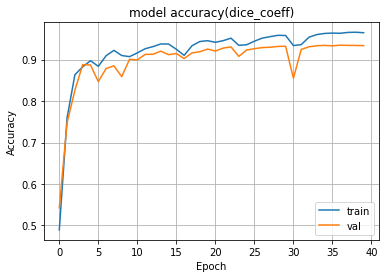

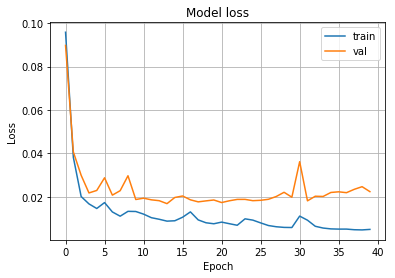

Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [14, 63, 85, 151, 187]
Sample Index of predictions with zero contours [33, 40, 63, 80, 85, 128, 187]
max-sigmoid values with zero contours [0.41553032, 0.00037621014, 0.0037911893, 0.00024373521, 0.00028742763, 0.0077507277, 0.018310608]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 4 [63, 85, 187, 256]
Sample Index where missed predictions >25% 24 [14, 26, 33, 40, 52, 80, 81, 92, 124, 128, 145, 151, 155, 169, 193, 201, 202, 210, 227, 231, 237, 241, 252, 259]
Sample Index where missed predictions >50% 14 [14, 26, 33, 40, 80, 128, 145, 151, 155, 169, 201, 210, 227, 259]
Sample Index where missed predictions >= 100% 8 [14, 26, 145, 151, 155, 201, 227, 259]


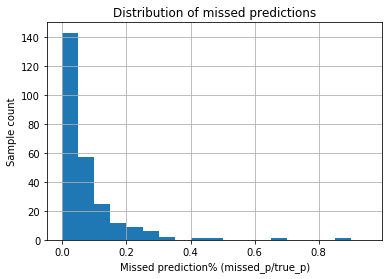

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


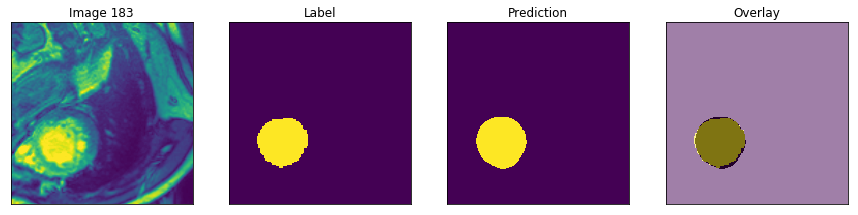

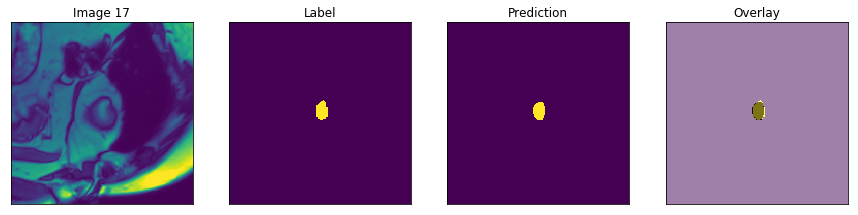

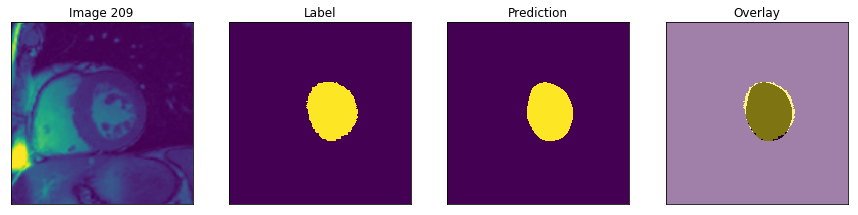

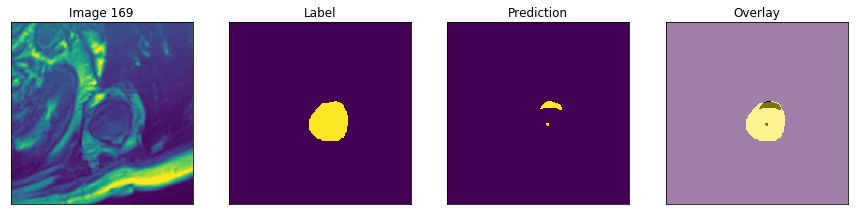

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


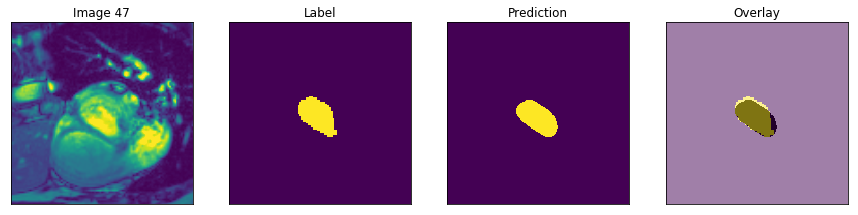

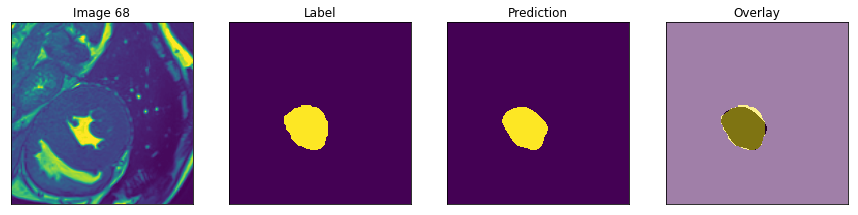

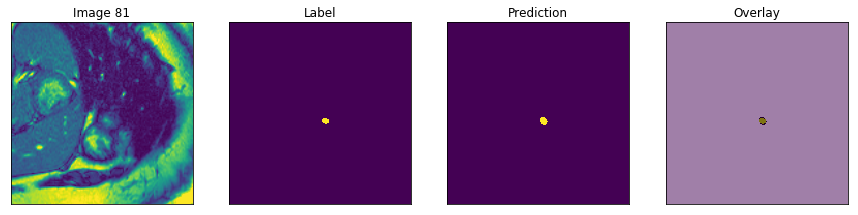

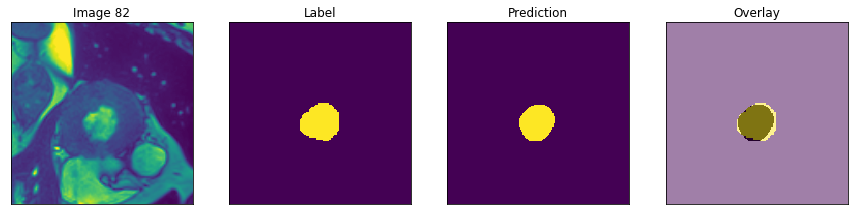

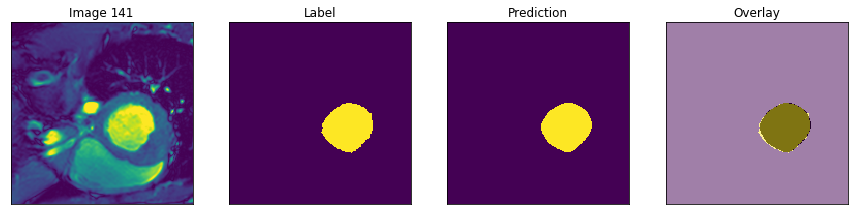

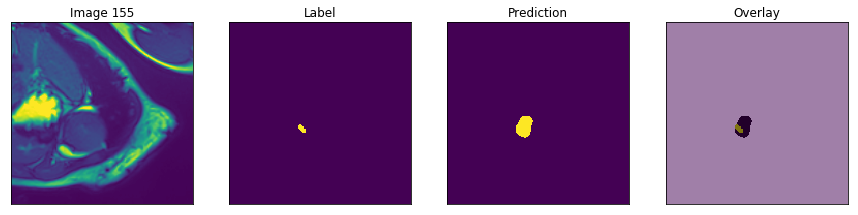

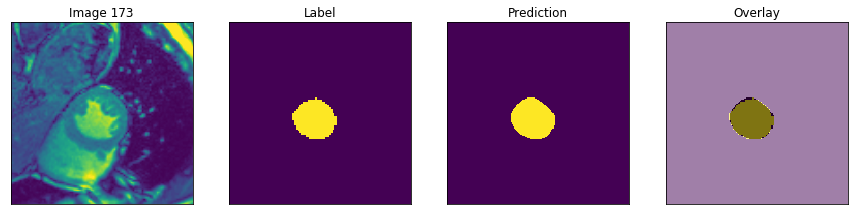

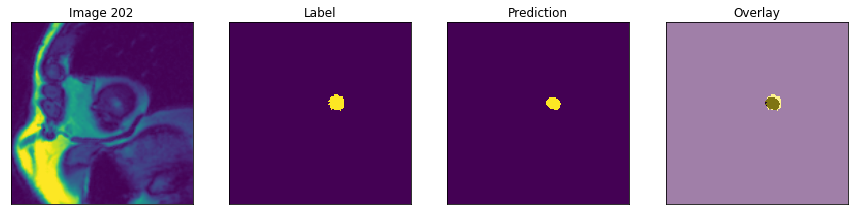

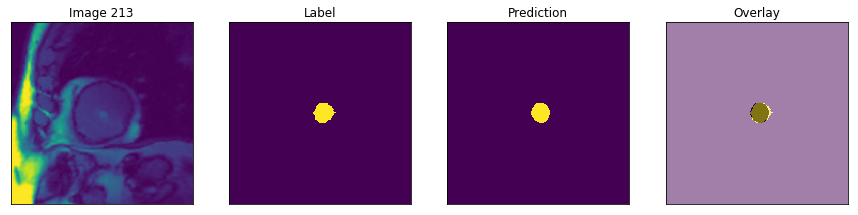

In [11]:
history_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_aug_2_1_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type1/data/combined_2_1_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type1/results/combined_drop_aug_2_1_176_predictions.npy"
plot_learning_history(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

samples, max, min  270 1.0 0.0


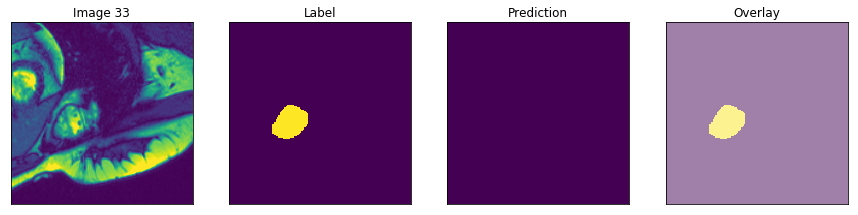

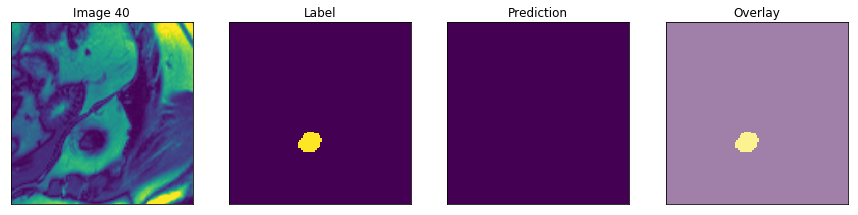

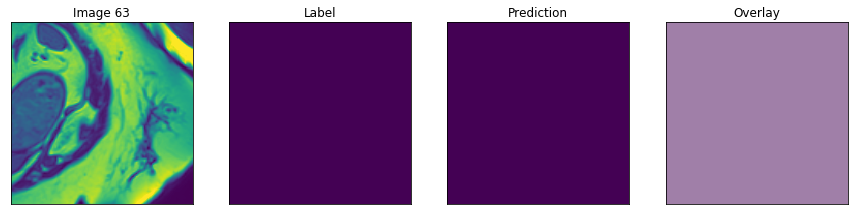

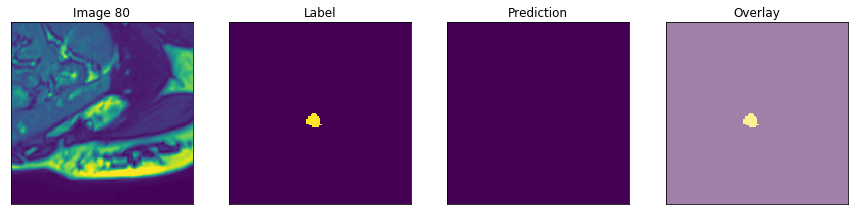

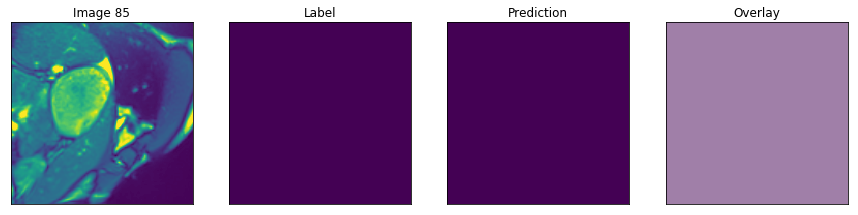

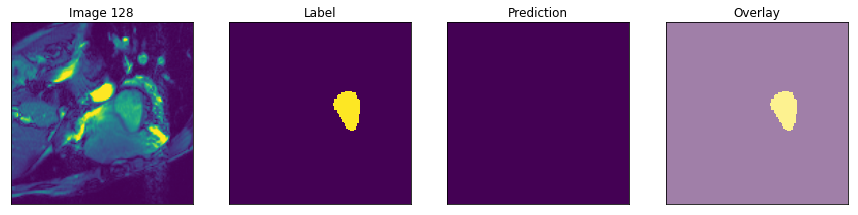

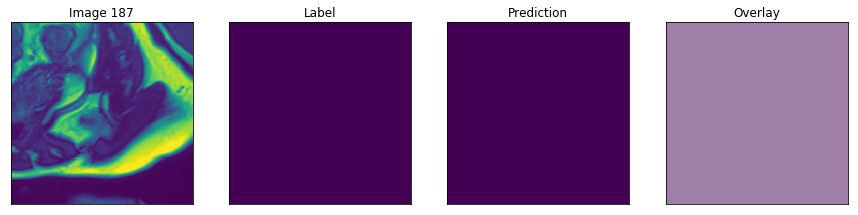

In [12]:
zcontour = [33, 40, 63, 80, 85, 128, 187]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

samples, max, min  270 1.0 0.0


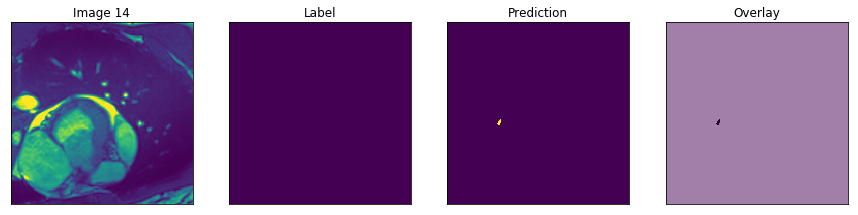

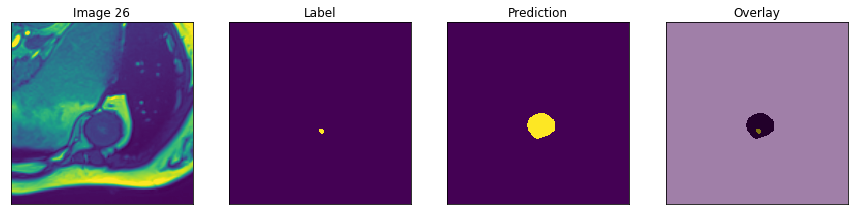

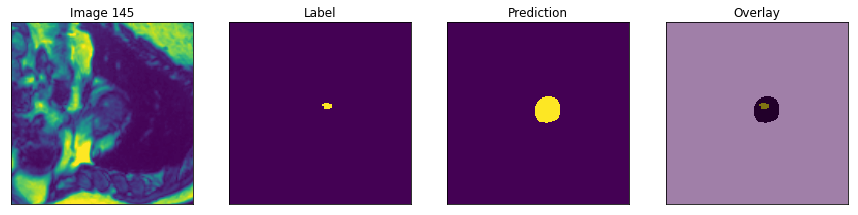

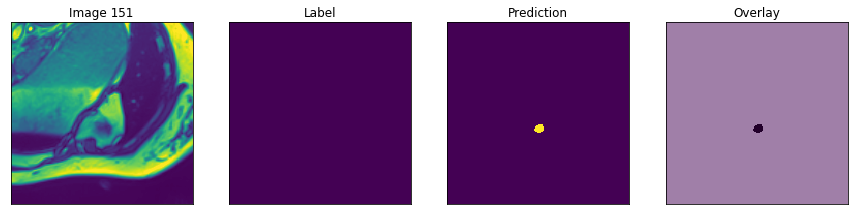

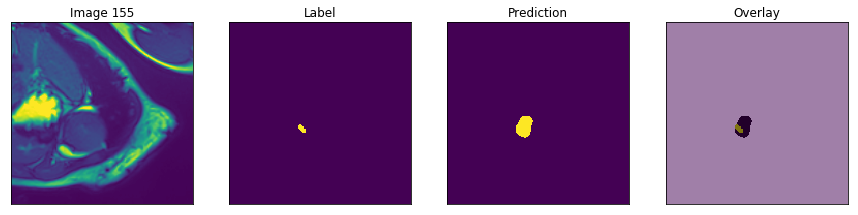

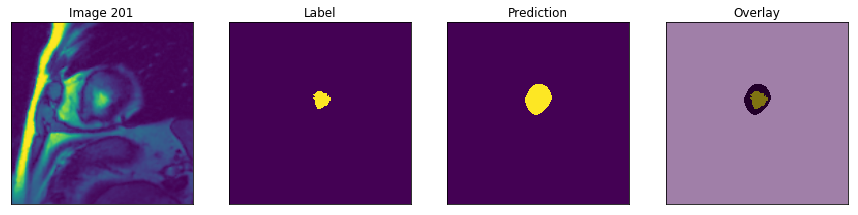

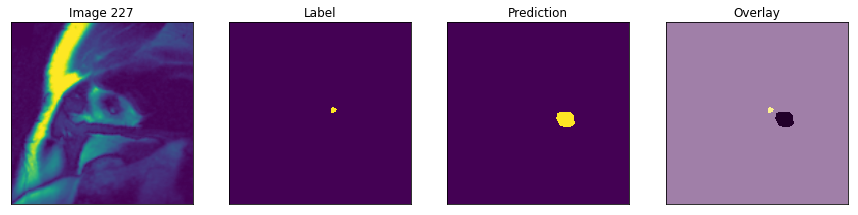

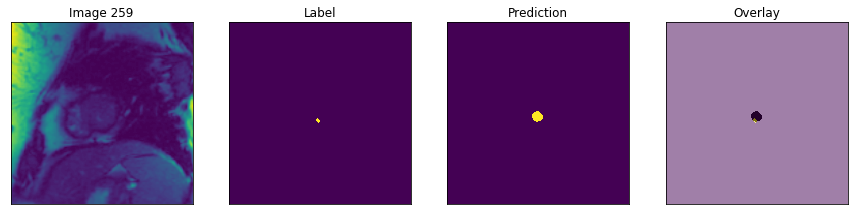

In [13]:
zcontour = [14, 26, 145, 151, 155, 201, 227, 259]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## Analysis of predictions on  DSB data set (256x256  images)

In [ ]:
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_images.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# find_outliers_in_prediction(pred_file)
# display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
# print ("-"*30)
# imglist = [21, 84, 127]
# display_images_predictions (image_file, pred_file, image_list = imglist)


## Analysis of predictions on  DSB data set (176x176  images)

In [ ]:
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_test_images.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_predictions.npy"
# find_outliers_in_prediction(pred_file)
# display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
# print ("-"*30)
# print ("-"*30)
# imglist = [173]
# display_images_predictions (image_file, pred_file, image_list = imglist)